# Практическая работа №5

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Задание №1

Найти данные для классификации.

Это официальный набор данных для Maven Halloween Challenge. 

В 2017 году Уолт Хики из FiveThirthyEight решил найти конфеты на Хэллоуин, которые больше всего нравятся людям. Чтобы выяснить это, он провел эксперимент, в котором онлайн-голосующие могли выбрать любимые конфеты из случайно сгенерированных соответствий.

In [3]:
df = pd.read_csv('./data/pract5/candy-data.csv')

## Задание №2

Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

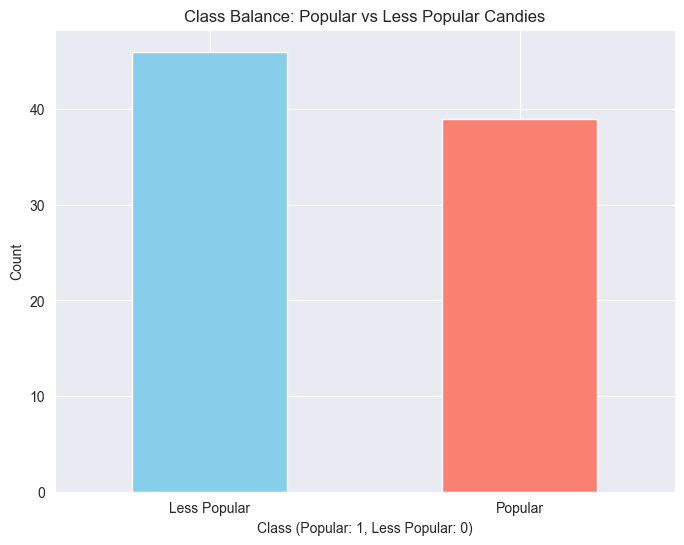

class
False    46
True     39
Name: count, dtype: int64

In [9]:
# Новый столбец для многоклассовой классификации
# Бинарный класс, где winpercent > 50 считается популярным (True), <= 50 - менее популярным (False)
df['class'] = df['winpercent'] > 50

# Plot the class balance
plt.figure(figsize=(8,6))
df['class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Balance: Popular vs Less Popular Candies')
plt.xlabel('Class (Popular: 1, Less Popular: 0)')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Less Popular', 'Popular'], rotation=0)
plt.show()

# Observing the balance of classes
class_counts = df['class'].value_counts()
class_counts

Гистограмма показывает, что классы “менее популярные” и “популярные” конфеты распределены относительно сбалансировано, с небольшим перевесом в сторону “менее популярных” (46 против 39). Это свидетельствует о том, что данные не являются сильно несбалансированными, и алгоритмы классификации смогут работать корректно без дополнительной обработки данных для балансировки классов.

## Задание №3

Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [24]:
# Признаки (X) и целевая переменная (y)
X = df.drop(columns=['competitorname', 'winpercent', 'class'])
y = df['class']

# Разделение данных на 80% тренировочной и 20% тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((68, 12), (17, 12)), ((68,), (17,)))

## Задание №4

Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics).

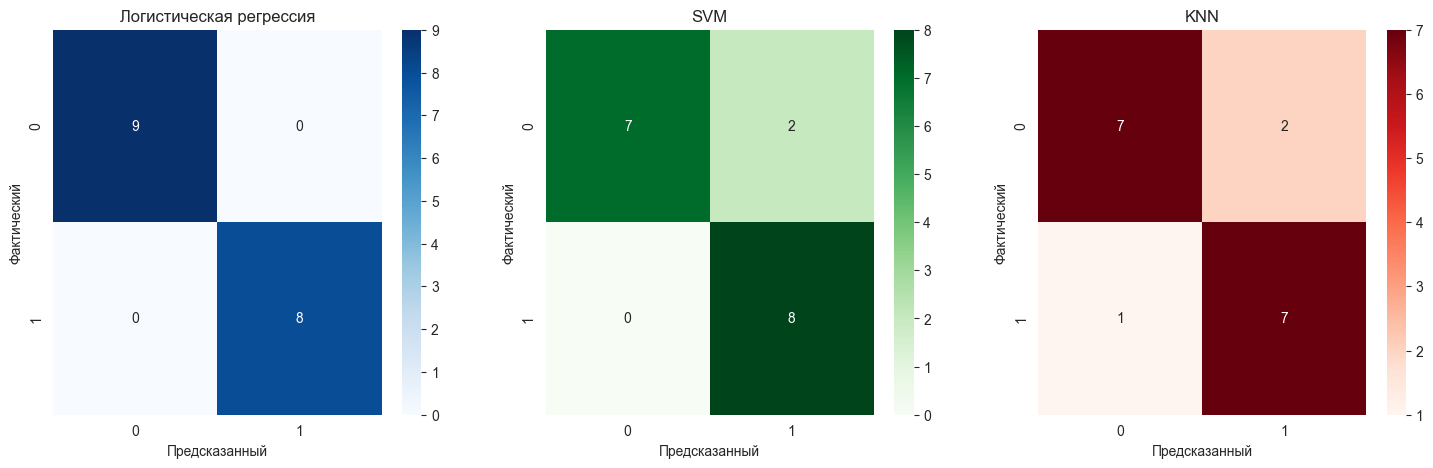

In [25]:
# Инициализация моделей
log_reg = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

# Обучение моделей
log_reg.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Прогноз на тестовых данных
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

# Построение матриц ошибок
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Визуализация матриц ошибок
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('Логистическая регрессия')
axs[0].set_xlabel('Предсказанный')
axs[0].set_ylabel('Фактический')

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title('SVM')
axs[1].set_xlabel('Предсказанный')
axs[1].set_ylabel('Фактический')

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Reds", ax=axs[2])
axs[2].set_title('KNN')
axs[2].set_xlabel('Предсказанный')
axs[2].set_ylabel('Фактический')

plt.show()

Матрицы ошибок для каждой модели показывают следующее:

1.	Логистическая регрессия:<br>
	•	Верно классифицировано 9 образцов как “менее популярные” и 8 образцов как “популярные”;<br>
	•	Ошибки: ошибки не были допущены.
2.	SVM:<br>
	•	Верно классифицировано 7 “менее популярных” и 8 “популярных” образцов;<br>
	•	Ошибки: 2 образца были неверно классифицированы как “популярные”.
3.	KNN:<br>
	•	Верно классифицировано 7 “менее популярных” и 7 “популярных” образцов;<br>
	•	Ошибки: 2 образца неверно отнесены к классу “популярных”, 1 образец — к “менее популярным”.

## Задание №5

Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру (можно использовать classification_report из sklearn.metrics). Сделать выводы.

**Теория**:

Accuracy (точность):

- Accuracy (общая точность) — это доля правильных предсказаний среди всех предсказаний;
- Она показывает, какую долю объектов модель предсказала правильно (как для положительных, так и для отрицательных классов);
- Это простая метрика, но при дисбалансе классов может быть не совсем информативной.

Precision (точность по классу):

- Precision (точность) — это доля правильно предсказанных положительных примеров (True Positive, TP) среди всех примеров, которые модель предсказала как положительные;
- Высокое значение precision означает, что из всех предсказанных моделью положительных примеров большинство действительно являются положительными (мало ложных положительных — False Positive, FP).

Recall (полнота):

- Recall (полнота) — это доля правильно предсказанных положительных примеров среди всех истинных положительных примеров (True Positive, TP) и тех, что модель пропустила (False Negative, FN);
- Recall отвечает на вопрос: “Насколько хорошо модель нашла все положительные примеры?” Если у модели высокий recall, это значит, что она нашла большую часть положительных объектов.

F1-мера:

- F1-мера — это гармоническое среднее между precision и recall. Она сбалансировано учитывает как точность, так и полноту;
- F1-мера полезна, когда важно, чтобы и precision, и recall были на высоком уровне, и одна из метрик не перевешивала другую.

In [23]:
# Сравнение для логистической регрессии
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Сравнение для SVM
report_svm = classification_report(y_test, y_pred_svm)

# Сравнение для KNN
report_knn = classification_report(y_test, y_pred_knn)

# Преобразуем отчеты в словари, а затем в DataFrame для более удобного отображения
report_log_reg_dict = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_svm_dict = classification_report(y_test, y_pred_svm, output_dict=True)
report_knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)

# Преобразуем отчеты в pandas DataFrame
report_log_reg_df = pd.DataFrame(report_log_reg_dict).transpose()
report_svm_df = pd.DataFrame(report_svm_dict).transpose()
report_knn_df = pd.DataFrame(report_knn_dict).transpose()

# Округляем значения для лучшей читаемости
report_log_reg_df = report_log_reg_df.round(2)
report_svm_df = report_svm_df.round(2)
report_knn_df = report_knn_df.round(2)

tools.display_dataframe_to_user(name="Отчет по классификации: Логистическая регрессия", dataframe=report_log_reg_df)
tools.display_dataframe_to_user(name="Отчет по классификации: SVM", dataframe=report_svm_df)
tools.display_dataframe_to_user(name="Отчет по классификации: KNN", dataframe=report_knn_df)

Отчет по классификации: Логистическая регрессия


Отчет по классификации: SVM


Отчет по классификации: KNN



- Логистическая регрессия показала лучшие результаты предсказания по метрикам.
- KNN немного уступает SVN по общей точности, но лучше справляется с определением “популярных” конфет, обеспечивая более высокий recall для этого класса.